## ERDAP with erddapy example for ITAE Prawler - 2018 M2 (BSITAEPR-2A)

__pyversion__==3.6   
__author__==S.Bell

In [1]:
import datetime
print("Last run {0}".format(datetime.datetime.now()))

Last run 2018-09-24 14:34:15.591443


### connecting and basic information

In [2]:
import warnings
#remove the numpy/pandas/cython warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed,")

from erddapy import ERDDAP
import pandas as pd
import numpy as np

server_url = 'http://downdraft.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)

In [3]:
df = pd.read_csv(e.get_search_url(response='csv', search_for='PRAWLER'))

In [4]:
'We have {} tabledap, {} griddap, and {} wms endpoints.'.format(
    len(set(df['tabledap'].dropna())),
    len(set(df['griddap'].dropna())),
    len(set(df['wms'].dropna()))
)

'We have 8 tabledap, 0 griddap, and 0 wms endpoints.'

In [5]:
prawlers = df['Dataset ID'].values
print(prawlers)

['erddap_4fd3_fb30_b89f' 'erddap_17bsitae_prawler'
 'erddap_17ckitaem2a_prawler' 'erddap_18bsitaepr2a_prawler'
 'erddap_18mtitaepr1a_prawler' 'erddap_17ckitaem2a_met'
 'erddap_18bsitaepr2a_met' 'erddap_18mtitaepr1a_met']


In [6]:
variables = [e.get_var_by_attr(dataset_id=prawler, standard_name=lambda v: v is not None) for prawler in prawlers]
print(variables)

[['latitude', 'longitude', 'depth', 'Chlorophyll', 'time', 'Salinity'], ['latitude', 'longitude', 'depth', 'Chlorophyll', 'time', 'Salinity'], ['SigmaT', 'latitude', 'Temperature', 'Turbidity', 'longitude', 'depth', 'Oxy_Temperature', 'Chlorophyll', 'time', 'Oxy_Sat', 'Salinity', 'Oxy_Conc'], ['latitude', 'longitude', 'depth', 'Chlorophyll', 'time', 'Salinity'], ['latitude', 'longitude', 'depth', 'Chlorophyll', 'time', 'Salinity'], ['latitude', 'eastward_wind', 'wind_speed', 'northward_wind', 'air_temperature', 'wind_from_direction', 'longitude', 'time', 'relative_humidity', 'air_pressure'], ['latitude', 'eastward_wind', 'wind_speed', 'northward_wind', 'air_temperature', 'wind_from_direction', 'longitude', 'time', 'relative_humidity', 'air_pressure'], ['latitude', 'eastward_wind', 'wind_speed', 'northward_wind', 'air_temperature', 'wind_from_direction', 'longitude', 'time', 'relative_humidity', 'air_pressure']]


### retrieving and plotting data

In [7]:
d = ERDDAP(server=server_url,
           protocol='tabledap',
           response='csv',
          )

d.dataset_id='erddap_18bsitaepr2a_prawler'

d.variables =  [
 'profile_id',
 'Temperature',
 'Salinity',
 'Chlorophyll',
 'Turbidity',
 'latitude',
 'longitude',
 'depth',
 'time',
 'Oxy_Conc',
 'Oxy_Sat'
]

d.constraints = {
    'time>=': '2018-01-01T00:00:00Z',
    'time<=': '2018-10-10T00:00:00Z',
    'latitude>=': 45,
    'latitude<=': 90,
    'longitude>=': 180,
    'longitude<=': 210,
    'profile_id!=': '18bsitaepr2a_met'
}

In [8]:
d.get_download_url()

'http://downdraft.pmel.noaa.gov:8080/erddap/tabledap/erddap_18bsitaepr2a_prawler.csv?profile_id,Temperature,Salinity,Chlorophyll,Turbidity,latitude,longitude,depth,time,Oxy_Conc,Oxy_Sat&time>=1514764800.0&time<=1539129600.0&latitude>=45&latitude<=90&longitude>=180&longitude<=210&profile_id!="18bsitaepr2a_met"'

In [9]:
df = d.to_pandas(
    index_col='time',
    parse_dates=True,
    skiprows=(1,)  # units information can be dropped.
).dropna()

df.head()

,profile_id,Temperature,Salinity,Chlorophyll,Turbidity,latitude,longitude,depth,Oxy_Conc,Oxy_Sat
time,,,,,,,,,,
2018-05-01 20:53:53,18bsitaepr2a_p0003,3.696,32.060,0.339,0.629,56.863998,195.947006,5.7,312.03460,98.69056
2018-05-01 20:54:01,18bsitaepr2a_p0003,3.693,32.063,0.315,0.557,56.863998,195.947006,5.6,311.99353,98.67280
2018-05-01 20:54:09,18bsitaepr2a_p0003,3.694,32.061,0.375,0.605,56.863998,195.947006,6.0,312.04153,98.68891
2018-05-01 20:54:17,18bsitaepr2a_p0003,3.686,32.062,0.339,0.605,56.863998,195.947006,5.9,312.03372,98.66802
2018-05-01 20:54:25,18bsitaepr2a_p0003,3.699,32.060,0.327,0.920,56.863998,195.947006,5.8,312.02933,98.69614


In [10]:
df.tail()

,profile_id,Temperature,Salinity,Chlorophyll,Turbidity,latitude,longitude,depth,Oxy_Conc,Oxy_Sat
time,,,,,,,,,,
2018-09-24 06:12:08,18bsitaepr2a_p5103,5.289,32.112,0.169,0.387,56.863998,195.947006,39.6,261.59946,86.005066
2018-09-24 06:12:16,18bsitaepr2a_p5103,5.200,32.099,0.121,0.460,56.863998,195.947006,41.2,255.49164,83.812550
2018-09-24 06:12:24,18bsitaepr2a_p5103,5.197,32.064,0.181,0.339,56.863998,195.947006,42.7,250.64783,82.194640
2018-09-24 06:12:32,18bsitaepr2a_p5103,5.194,32.052,0.194,0.436,56.863998,195.947006,44.7,245.19406,80.393295
2018-09-24 06:12:40,18bsitaepr2a_p5103,5.167,32.040,0.181,0.387,56.863998,195.947006,46.4,240.87143,78.918480


#### Temperature

In [11]:
#qc
df['Temperature'][df['Temperature']>20]=np.nan

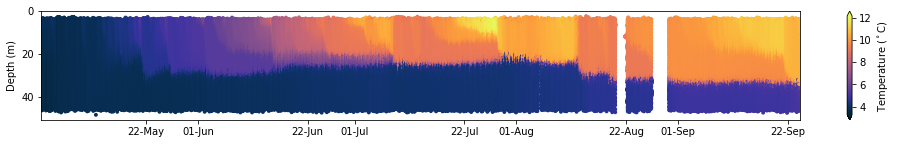

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean

fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['Temperature'], marker='o', edgecolor='none', cmap=cmocean.cm.thermal)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)');

In [13]:
print("""
max temp: {0:0.4}
min temp: {1:0.4}""".format(df['Temperature'].max(), df['Temperature'].min()))


max temp: 12.16
min temp: 3.264


#### Salinity

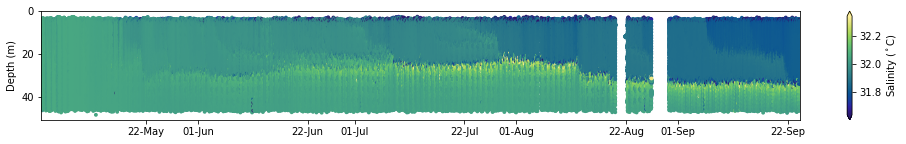

In [14]:
#bounds
lower = df['Salinity'].mean()-3*df['Salinity'].std()
upper = df['Salinity'].mean()+3*df['Salinity'].std()

#plot
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['Salinity'], marker='o', edgecolor='none', vmin=lower, vmax=upper, cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity ($^\circ$C)')
ax.set_ylabel('Depth (m)');

In [15]:
print("""
max sal: {0:0.4}
min sal: {1:0.4}""".format(df['Salinity'].max(), df['Salinity'].min()))

print("""
mean sal: {0:0.4}
sal std: {1:04}""".format(df['Salinity'].mean(),df['Salinity'].std()))


max sal: 36.28
min sal: 30.05

mean sal: 31.99
sal std: 0.11742528678640851


#### Chlorophyl

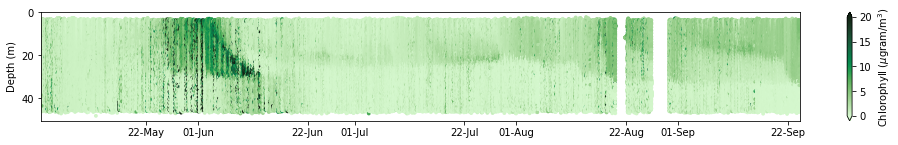

In [16]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['Chlorophyll'], marker='o', edgecolor='none', vmin=0, vmax=20, cmap=cmocean.cm.algae)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
#ax.set_xlim(datetime.datetime(2018,5,25),datetime.datetime.today())
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Chlorophyll ($\mu$gram/m$^3$)')
ax.set_ylabel('Depth (m)');

In [17]:
print("""
max chlorophyll: {0:0.4}
min chlorophyll: {1:0.4}""".format(df['Chlorophyll'].max(), df['Chlorophyll'].min()))


max chlorophyll: 742.9
min chlorophyll: -0.0


#### Chlorophyl (log scale)

/Volumes/WDC_internal/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


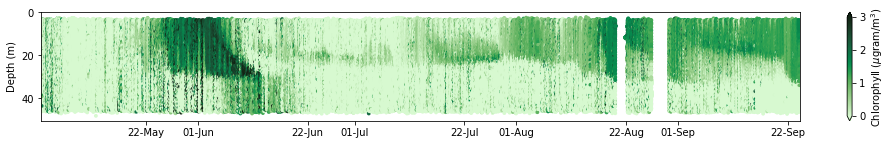

In [18]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=np.log(df['Chlorophyll']), marker='o', edgecolor='none', vmin=0, vmax=3, cmap=cmocean.cm.algae)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
#ax.set_xlim(datetime.datetime(2018,5,25),datetime.datetime.today())
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Chlorophyll ($\mu$gram/m$^3$)')
ax.set_ylabel('Depth (m)');

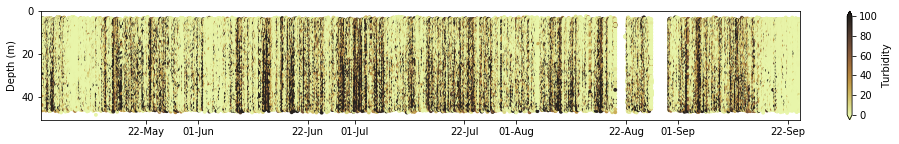

In [19]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['Turbidity'], marker='o', edgecolor='none', vmin=0, vmax=100, cmap=cmocean.cm.turbid)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Turbidity')
ax.set_ylabel('Depth (m)');

In [20]:
import seawater as sw
sigmat = sw.dens(s=df['Salinity'],t=df['Temperature'],p=df['depth']) - 1000.

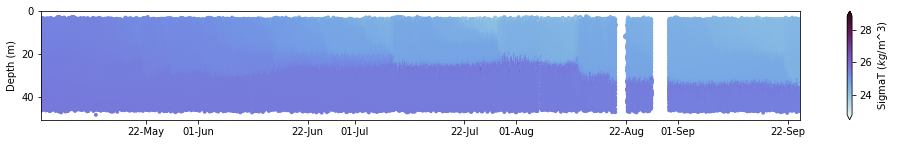

In [21]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=sigmat, marker='o', edgecolor='none', cmap=cmocean.cm.dense)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('SigmaT ($kg/$m^3)')
ax.set_ylabel('Depth (m)');

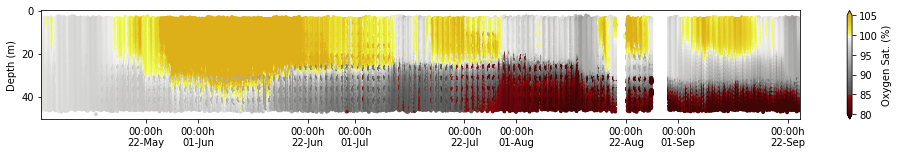

In [22]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['Oxy_Sat'], marker='o', vmin=80, vmax=105, edgecolor='none', cmap=cmocean.cm.oxy)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen Sat. (%)')
ax.set_ylabel('Depth (m)');

#### Zooming in on a small period to evaluate oxygen calibration casts June-8 through June-15

color scheme is not consistent with above in order to show variablility better

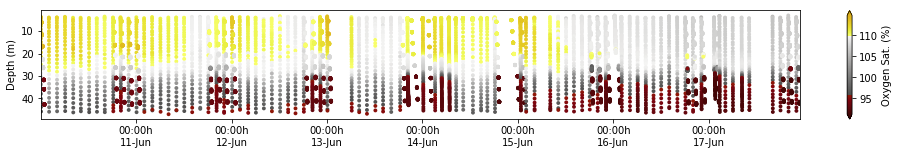

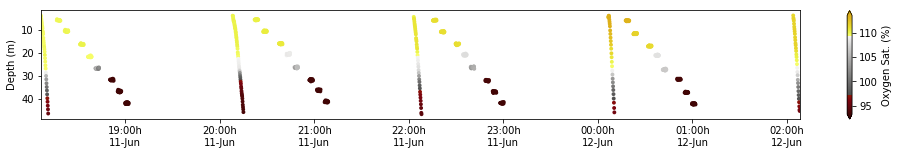

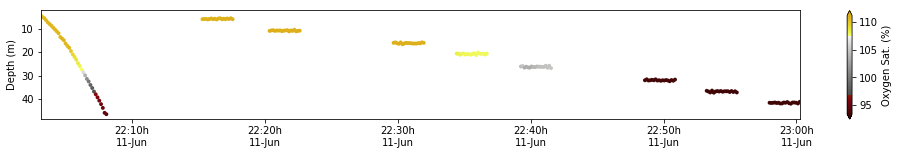

In [23]:
dfsub = df['2018-06-10':'2018-06-17']

fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(dfsub.index, dfsub['depth'], s=15, c=dfsub['Oxy_Sat'], marker='o', edgecolor='none', cmap=cmocean.cm.oxy)

ax.invert_yaxis()
ax.set_xlim(dfsub.index[0], dfsub.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen Sat. (%)')
ax.set_ylabel('Depth (m)');

dfsub = df['2018-06-11 17:00':'2018-06-12 03:00']

fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(dfsub.index, dfsub['depth'], s=15, c=dfsub['Oxy_Sat'], marker='o', edgecolor='none', cmap=cmocean.cm.oxy)

ax.invert_yaxis()
ax.set_xlim(dfsub.index[0], dfsub.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen Sat. (%)')
ax.set_ylabel('Depth (m)');

dfsub = df['2018-06-11 22:00':'2018-06-11 23:30']

fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(dfsub.index, dfsub['depth'], s=15, c=dfsub['Oxy_Sat'], marker='o', edgecolor='none', cmap=cmocean.cm.oxy)

ax.invert_yaxis()
ax.set_xlim(dfsub.index[0], dfsub.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen Sat. (%)')
ax.set_ylabel('Depth (m)');

### Calibration/Characterization Profiles

**Whats the explanation for the clear pattern of cal profiles having lower values than the full profiles as one goes to depth, especially below the pycno/thermocline**
Initial evaluation is that an oxygen sensor lag may be indicating high values of oxygen concentration deeper in the column than is actually the case based on the calibration profiles (full profiles are higher at equivalent depths...)

Lets investigate this by plotting up a few profiles with the corresponding calibration cast.  We need to do it two ways:
- as a function of depth without time to see how they overlay (features on a sub daily timescale may make this hard)
- as a timeseries for each park and hold to see how long the equilibration takes

Lets choose ~~June 25th~~ ** the last day **

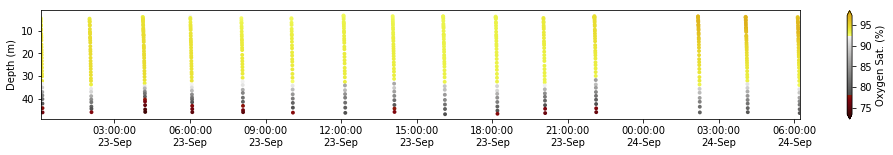

In [24]:
#dfsub = df['2018-06-25':'2018-06-25']
dfsub = df[datetime.datetime.strftime(datetime.date.today() - datetime.timedelta(hours=24),'%Y-%m-%d'):datetime.datetime.strftime(datetime.date.today(),'%Y-%m-%d')]

if dfsub.empty:
    print("No Profiles in time window")
else:
    fig, ax = plt.subplots(figsize=(17, 2))
    cs = ax.scatter(dfsub.index, dfsub['depth'], s=15, c=dfsub['Oxy_Sat'], marker='o', edgecolor='none', cmap=cmocean.cm.oxy)

    ax.invert_yaxis()
    ax.set_xlim(dfsub.index[0], dfsub.index[-1])

    xfmt = mdates.DateFormatter('%H:%M:%S\n%d-%b')
    ax.xaxis.set_major_formatter(xfmt)

    cbar = fig.colorbar(cs, orientation='vertical', extend='both')
    cbar.ax.set_ylabel('Oxygen Sat. (%)')
    ax.set_ylabel('Depth (m)');

In [25]:
#groupby profile id
dfsg = dfsub.groupby('profile_id')

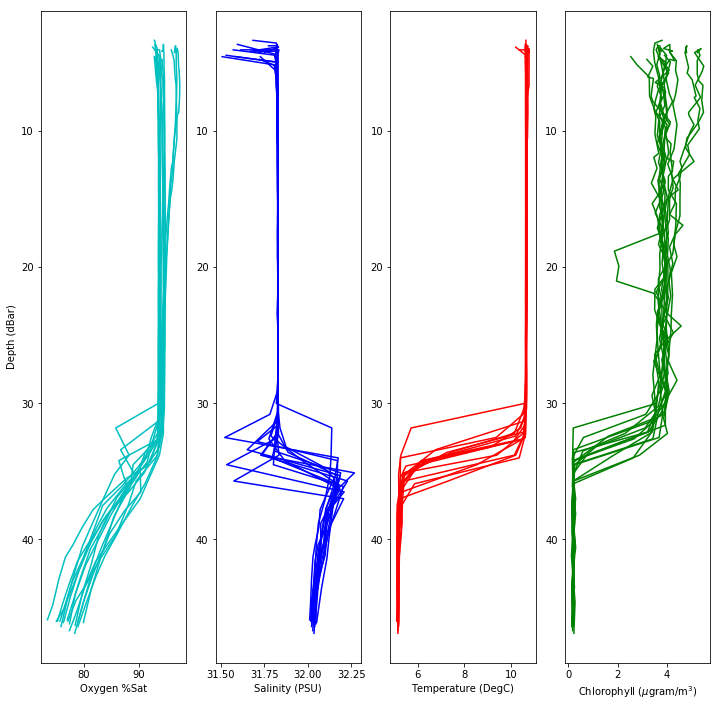

In [26]:
fig, ax = plt.subplots(1,4,figsize=(12, 12))

for i,cast in enumerate(dfsg.groups):
    if dfsg.get_group(cast)['depth'].std() > 1:
        cs = ax[0].plot(dfsg.get_group(cast)['Oxy_Sat'],dfsg.get_group(cast)['depth'],'c-')
        cs = ax[1].plot(dfsg.get_group(cast)['Salinity'],dfsg.get_group(cast)['depth'],'b-')
        cs = ax[2].plot(dfsg.get_group(cast)['Temperature'],dfsg.get_group(cast)['depth'],'r-')
        cs = ax[3].plot(dfsg.get_group(cast)['Chlorophyll'],dfsg.get_group(cast)['depth'],'g-')
    else:
        cs = ax[0].plot(dfsg.get_group(cast)['Oxy_Sat'],dfsg.get_group(cast)['depth'],'k+')
        cs = ax[1].plot(dfsg.get_group(cast)['Salinity'],dfsg.get_group(cast)['depth'],'k+')
        cs = ax[2].plot(dfsg.get_group(cast)['Temperature'],dfsg.get_group(cast)['depth'],'k+')
        cs = ax[3].plot(dfsg.get_group(cast)['Chlorophyll'],dfsg.get_group(cast)['depth'],'k+')

ax[0].set_xlabel('Oxygen %Sat')        
ax[0].set_ylabel('Depth (dBar)')        
ax[0].invert_yaxis()
ax[1].set_xlabel('Salinity (PSU)')        
ax[1].invert_yaxis()
ax[2].set_xlabel('Temperature (DegC)')        
ax[2].invert_yaxis()
ax[3].set_xlabel('Chlorophyll ($\mu$gram/m$^3$)')        
ax[3].invert_yaxis()

**Top Bin is seems to underestimate... may be contaminated by sfc?** remove it for plotting below.

Also, plot the last sampled value at each calibration park depth instead of every value

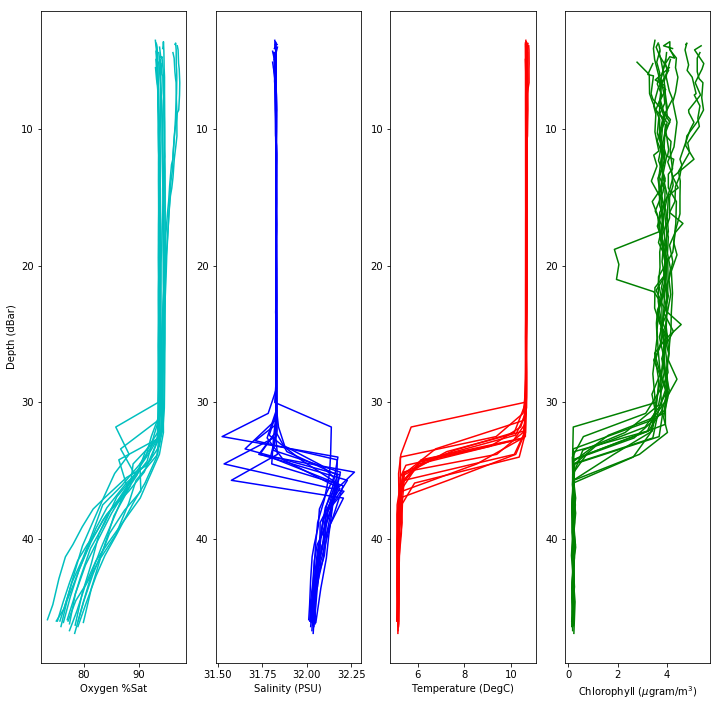

In [27]:
fig, ax = plt.subplots(1,4,figsize=(12, 12))

for i,cast in enumerate(dfsg.groups):
    if dfsg.get_group(cast)['depth'].std() > 1:
        cs = ax[0].plot(dfsg.get_group(cast)['Oxy_Sat'][1:],dfsg.get_group(cast)['depth'][1:],'c-')
        cs = ax[1].plot(dfsg.get_group(cast)['Salinity'][1:],dfsg.get_group(cast)['depth'][1:],'b-')
        cs = ax[2].plot(dfsg.get_group(cast)['Temperature'][1:],dfsg.get_group(cast)['depth'][1:],'r-')
        cs = ax[3].plot(dfsg.get_group(cast)['Chlorophyll'][1:],dfsg.get_group(cast)['depth'][1:],'g-')
    else:
        cs = ax[0].plot(dfsg.get_group(cast)['Oxy_Sat'].last('s'),dfsg.get_group(cast)['depth'].last('s'),'k+')
        cs = ax[1].plot(dfsg.get_group(cast)['Salinity'].last('s'),dfsg.get_group(cast)['depth'].last('s'),'k+')
        cs = ax[2].plot(dfsg.get_group(cast)['Temperature'].last('s'),dfsg.get_group(cast)['depth'].last('s'),'k+')
        cs = ax[3].plot(dfsg.get_group(cast)['Chlorophyll'].last('s'),dfsg.get_group(cast)['depth'].last('s'),'k+')

ax[0].set_xlabel('Oxygen %Sat')        
ax[0].set_ylabel('Depth (dBar)')        
ax[0].invert_yaxis()
ax[1].set_xlabel('Salinity (PSU)')        
ax[1].invert_yaxis()
ax[2].set_xlabel('Temperature (DegC)')        
ax[2].invert_yaxis()
ax[3].set_xlabel('Chlorophyll ($\mu$gram/m$^3$)')        
ax[3].invert_yaxis()

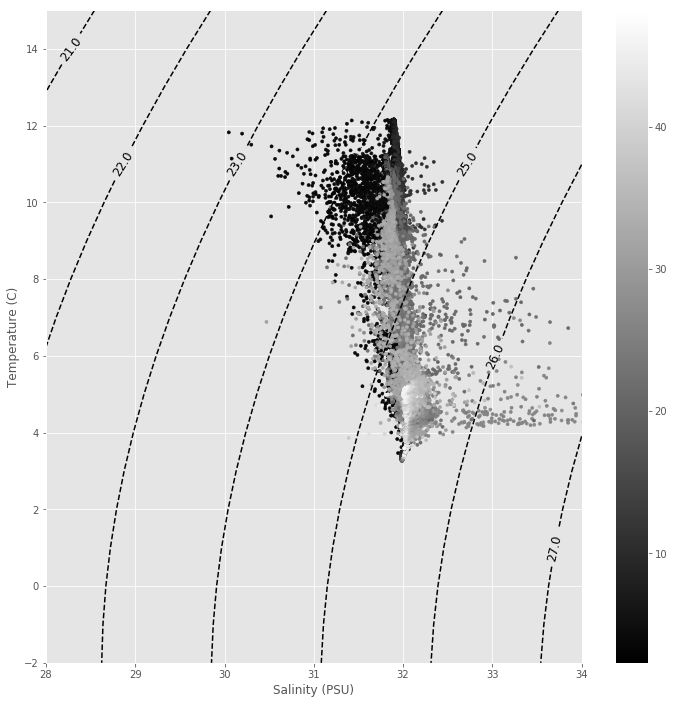

In [28]:

def plot_salvtemp(salt, temp, press, srange=[28,34], trange=[-2,15], ptitle=""): 
    plt.style.use('ggplot')
    
    # Figure out boudaries (mins and maxs)
    smin = srange[0]
    smax = srange[1]
    tmin = trange[0]
    tmax = trange[1]

    # Calculate how many gridcells we need in the x and y dimensions
    xdim = int(round((smax-smin)/0.1+1,0))
    ydim = int(round((tmax-tmin)+1,0))
    
    #print 'ydim: ' + str(ydim) + ' xdim: ' + str(xdim) + ' \n'
    if (xdim > 10000) or (ydim > 10000): 
        print('To many dimensions for grid in {cruise} {cast} file. Likely  missing data \n'.format(cruise=cruise,cast=cast))
        return
 
    # Create empty grid of zeros
    dens = np.zeros((ydim,xdim))
 
    # Create temp and salt vectors of appropiate dimensions
    ti = np.linspace(0,ydim-1,ydim)+tmin
    si = np.linspace(0,xdim-1,xdim)*0.1+smin
 
    # Loop to fill in grid with densities
    for j in range(0,int(ydim)):
        for i in range(0, int(xdim)):
            dens[j,i]=sw.dens0(si[i],ti[j])
 
    # Substract 1000 to convert to sigma-t
    dens = dens - 1000
 
    # Plot data ***********************************************
    fig = plt.figure(figsize=(12, 12))
    ax1 = fig.add_subplot(111)
    CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')
    plt.clabel(CS, fontsize=12, inline=1, fmt='%1.1f') # Label every second level
 
    ts = ax1.scatter(salt,temp, c=press, cmap='gray', s=10)
    plt.colorbar(ts )
    plt.ylim(tmin,tmax)
    plt.xlim(smin,smax)
 
    ax1.set_xlabel('Salinity (PSU)')
    ax1.set_ylabel('Temperature (C)')

    
    t = fig.suptitle(ptitle, fontsize=12, fontweight='bold')
    t.set_y(1.08)
    return fig  

fig = plot_salvtemp(df['Salinity'],df['Temperature'],df['depth'])

### Bin data to calculate integrate heat proxy (depth averaged temperature)

Setup 1m bins:
- code below will make all data deeper than prawler missing, thus biasing the averages to the upper 40m-50m.  Shapes may likely stay the same if the column is mixed, but maginitudes will be less.

In [29]:
#depth averaged temp - interpolate to 1m bins before averaging
def depth_ave(param, print_values=False):
    dfint= df.groupby('profile_id')

    fig, ax = plt.subplots(figsize=(17, 2))

    for i,cast in enumerate(dfint.groups):
        if dfint.get_group(cast)['depth'].std() > 1:
            #only use available data... bias towards prawler
            IntTemp = np.interp(np.arange(0,74,1),dfint.get_group(cast)['depth'], dfint.get_group(cast)[param], right=np.nan, left=np.nan)
            cs = ax.scatter(dfint.get_group(cast).index[0], np.nanmean(IntTemp), s=15, c='g', marker='o', edgecolor='none')
            
            #extrapolate to top and bottom
            IntTemp = np.interp(np.arange(0,74,1),dfint.get_group(cast)['depth'], dfint.get_group(cast)[param])
            cs = ax.scatter(dfint.get_group(cast).index[0], np.nanmean(IntTemp), s=15, c='r', marker='o', edgecolor='none')
            
            if print_values:
                print("{0},{1}".format(dfint.get_group(cast).index[0], np.nanmean(IntTemp)))

        xfmt = mdates.DateFormatter('%d-%b')
        ax.xaxis.set_major_formatter(xfmt)

        ax.set_ylabel(param)
        ax.set_xlabel('Time (UTC)')  


/Volumes/WDC_internal/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: Mean of empty slice


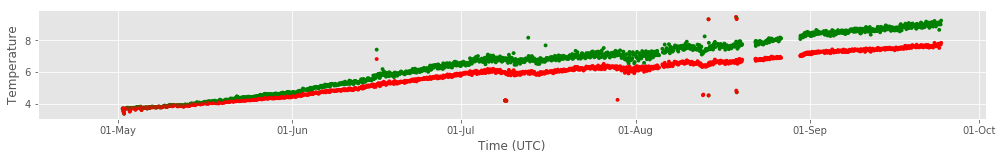

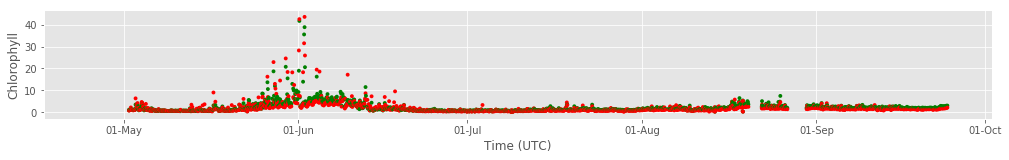

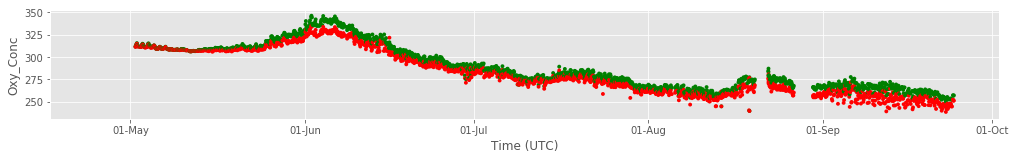

In [30]:
#depth averaged temp - interpolate to 1m bins before averaging
depth_ave('Temperature',print_values=False)
#depth averaged chlor - interpolate to 1m bins before averaging
depth_ave('Chlorophyll')
#depth averaged oxy - interpolate to 1m bins before averaging
depth_ave('Oxy_Conc')

- Above plots, red plots result from extrapolating the last point down to 74m (**74m historically when calculating ht content**), and up to the sfc then taking the mean.  Green points result from making all data below the prawler and above the prawler, "missing" and then taking the mean.

In [31]:
#depth chosen temp - interpolate to 1m bins before retrieving
def depth_csv(param,depth):
    dfint= df.groupby('profile_id')


    for i,cast in enumerate(dfint.groups):
        if dfint.get_group(cast)['depth'].std() > 1:
            IntTemp = np.interp(np.arange(0,74,1),dfint.get_group(cast)['depth'], dfint.get_group(cast)[param])
            print("{0},{1}".format(dfint.get_group(cast).index[depth], IntTemp))

    #print just last data point as a sanity check
    #print("{0},{1}".format(dfint.get_group(cast).index, IntTemp))
#depth_csv('Temperature',5)


In [32]:
draw =pd.read_csv('/Volumes/WDC_internal/Users/bell/in_and_outbox/Ongoing_Analysis/M2_IntegratedTemp/year_over_year/raw_prawler_data/2018Prawler.csv',
                  parse_dates=['datetime'], index_col='datetime')
draw.resample('1h').mean().interpolate(limit=1).to_csv('Prawler_1hr.csv')